<a href="https://colab.research.google.com/github/raffieeey/MasterResearchAutoML/blob/master/02A_H2OAutoml_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing dependecies for H2O automl

In [1]:
!pip install pmlb
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install pytictoc

  Created wheel for pmlb: filename=pmlb-0.3-cp36-none-any.whl size=11918 sha256=d07cdc9123a0b270a96cfc1e297aa4bd18528e49c6a4b58e9cb770be721eac0e
  Stored in directory: /root/.cache/pip/wheels/5a/c7/a4/be59e63a2cb56f6c58f068305b95c212e0aac1a930fd77d6b0
Successfully built pmlb


In [0]:
#!pip uninstall h2o -y

## Installing H2O

In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 123.6MB 183kB/s 
  Created wheel for h2o: filename=h2o-3.26.0.5-py2.py3-none-any.whl size=123672284 sha256=44638fcf24e15a99830a66b6ab6fcf22f10f3b09924e7952fa10790f1003486c
  Stored in directory: /root/.cache/pip/wheels/c9/d2/24/eeb5f07ff6826ea23325338cd3fb5754b99592a3f2b4e67f27
Successfully built h2o


## Getting the number of Cores

In [7]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

##Starting H2O

In [0]:
import h2o

In [9]:
h2o.init(nthreads=2,
                 min_mem_size="2048M",
                 max_mem_size="2048M")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.4" 2019-07-16; OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3); OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3mi6qu_r
  JVM stdout: /tmp/tmp3mi6qu_r/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3mi6qu_r/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.5
H2O cluster version age:,"7 days, 9 hours and 54 minutes"
H2O cluster name:,H2O_from_python_unknownUser_kdzz9p
H2O cluster total nodes:,1
H2O cluster free memory:,2 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [10]:
%matplotlib inline
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np



def get_auc(labels, scores):
    fpr, tpr, thresholds = roc_curve(labels, scores)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score


def get_aucpr(labels, scores):
    precision, recall, th = precision_recall_curve(labels, scores)
    aucpr_score = np.trapz(recall, precision)
    return precision, recall, aucpr_score


def plot_metric(ax, x, y, x_label, y_label, plot_label, style="-"):
    ax.plot(x, y, style, label=plot_label)
    ax.legend()
    
    ax.set_ylabel(x_label)
    ax.set_xlabel(y_label)


def prediction_summary(labels, predicted_score, info, plot_baseline=True, axes=None):
    if axes is None:
        axes = [plt.subplot(1, 2, 1), plt.subplot(1, 2, 2)]

    fpr, tpr, auc_score = get_auc(labels, predicted_score)
    plot_metric(axes[0], fpr, tpr, "False positive rate","True positive rate", "{} AUC = {:.4f}".format(info, auc_score))
    if plot_baseline:
        plot_metric(axes[0], [0, 1], [0, 1], "False positive rate","True positive rate", "baseline AUC = 0.5", "r--")

    precision, recall, aucpr_score = get_aucpr(labels, predicted_score)
    plot_metric(axes[1], recall, precision, "Recall","Precision", "{} AUCPR = {:.4f}".format(info, aucpr_score))
    if plot_baseline:
        thr = (np.sum(labels)/len(labels))[0]
        plot_metric(axes[1], [0, 1], [thr, thr], "Recall","Precision", "baseline AUCPR = {:.4f}".format(thr), "r--")

    plt.show()
    return axes


def figure():
    fig_size = 4.5
    f = plt.figure()
    f.set_figheight(fig_size)
    f.set_figwidth(fig_size*2)

figure()

<Figure size 648x324 with 0 Axes>

In [0]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score, log_loss
import numpy as np
import pandas as pd


class CheckBinomial:
  def __init__(self, checkunique):
    self._bintype = 'binomial' if pd.Series(checkunique).nunique() == 2 else 'multinomial'

  def MLMetrics(self):
    if self._bintype == 'binomial':
      return ['mean_per_class_error', 'AUC', 'logloss']
    elif self._bintype == 'multinomial':
      return ['mean_per_class_error', 'logloss']

class MetricsCalc:
  def __init__(self, truth, predictions):
    self.truth = truth.as_data_frame()
    self.predictions = predictions
    self._target = predictions.iloc[:,0]
    self._probabmax = np.max(predictions.iloc[:,1:], axis=1)
    self._probab = predictions.iloc[:,1:]
    self._type = 'binomial' if len(self.truth.nunique()) == 2 else 'multinomial'

  def acc(self):
    return float(accuracy_score(self.truth,self._target))

  def auc(self):
    return float(roc_auc_score(self.truth, self._probabmax))

  def logloss(self):
    return float(log_loss(self.truth, self._probab))
  
  def cm(self):
    return confusion_matrix(self.truth, self._target)
  
  def f1(self,average='binary' ):
    return float(f1_score(self.truth, self._target, average='binary')) 

________________________________________________________________________________
*** Dataset Name: adult ***
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Elapsed time is 60.602786 seconds.
*** Top algorithm: *** 

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_20190924_090729,0.921674,0.296639,0.216781,0.303399,0.092051



xgboost prediction progress: |████████████████████████████████████████████| 100%


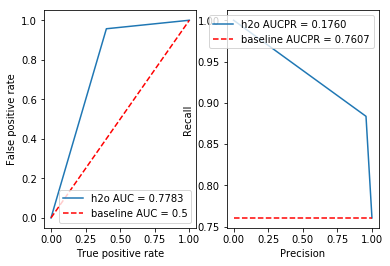

________________________________________________________________________________
*** Dataset Name: adult ***
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Elapsed time is 61.559526 seconds.
*** Top algorithm: *** 

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_20190924_090832,0.92278,0.29328,0.22089,0.302475,0.0914909



xgboost prediction progress: |████████████████████████████████████████████| 100%


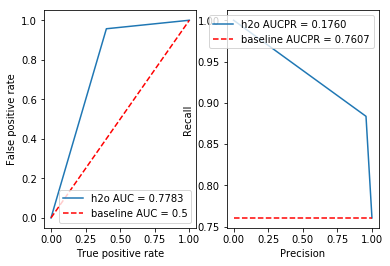

________________________________________________________________________________
*** Dataset Name: adult ***
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Elapsed time is 61.630070 seconds.
*** Top algorithm: *** 

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_20190924_090936,0.922492,0.293855,0.228589,0.302663,0.0916047



xgboost prediction progress: |████████████████████████████████████████████| 100%


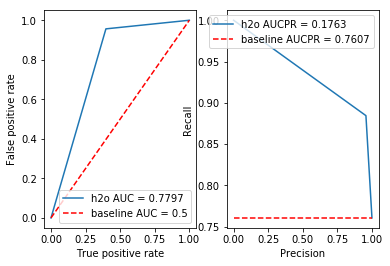

________________________________________________________________________________
*** Dataset Name: agaricus-lepiota ***
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Elapsed time is 63.991417 seconds.
*** Top algorithm: *** 

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_2_AutoML_20190924_091039,1,0.0276882,0,0.0312407,0.000975979
XGBoost_3_AutoML_20190924_091039,1,0.01239,0,0.0279337,0.000780291
StackedEnsemble_AllModels_AutoML_20190924_091039,1,0.0012149,0,0.00426404,1.8182e-05
StackedEnsemble_BestOfFamily_AutoML_20190924_091039,1,0.00192838,0,0.00524285,2.74874e-05
GBM_4_AutoML_20190924_091039,1,0.0197564,0,0.0218162,0.000475945



gbm prediction progress: |████████████████████████████████████████████████| 100%


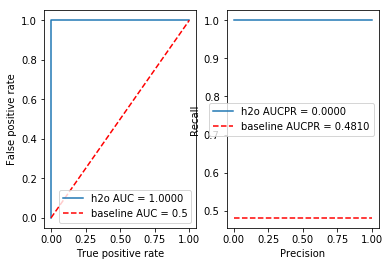

________________________________________________________________________________
*** Dataset Name: agaricus-lepiota ***
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Elapsed time is 62.868886 seconds.
*** Top algorithm: *** 

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_20190924_091144,1,0.00629788,0,0.0193734,0.000375327
StackedEnsemble_BestOfFamily_AutoML_20190924_091144,1,0.00429369,0,0.00812099,6.59505e-05
StackedEnsemble_AllModels_AutoML_20190924_091144,1,0.00348562,0,0.0158403,0.000250914
XGBoost_2_AutoML_20190924_091144,0.999982,0.0547176,0.00207547,0.0764219,0.00584031



xgboost prediction progress: |████████████████████████████████████████████| 100%


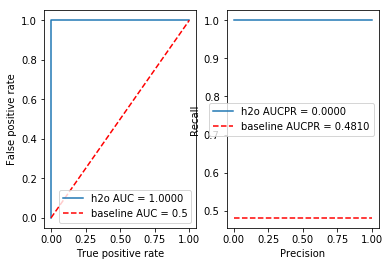

________________________________________________________________________________
*** Dataset Name: agaricus-lepiota ***
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Elapsed time is 62.788908 seconds.
*** Top algorithm: *** 

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20190924_091249,1,0.0034647,0,0.0160263,0.000256843
StackedEnsemble_BestOfFamily_AutoML_20190924_091249,1,0.00431205,0,0.00850471,7.23302e-05
XGBoost_1_AutoML_20190924_091249,1,0.00636936,0,0.019603,0.000384276
XGBoost_2_AutoML_20190924_091249,0.999989,0.0400958,0.00183353,0.0655209,0.00429299



stackedensemble prediction progress: |████████████████████████████████████| 100%


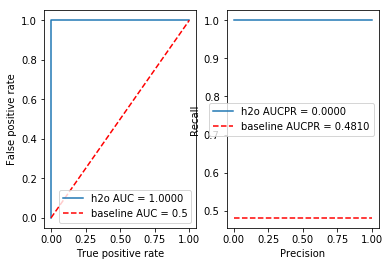

________________________________________________________________________________
*** Dataset Name: churn ***
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Elapsed time is 64.205846 seconds.
*** Top algorithm: *** 

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_3_AutoML_20190924_091353,0.920028,0.159413,0.0997353,0.192539,0.0370714
StackedEnsemble_AllModels_AutoML_20190924_091353,0.916014,0.138807,0.101068,0.182187,0.0331922
GBM_4_AutoML_20190924_091353,0.91989,0.154535,0.101457,0.187801,0.0352691
StackedEnsemble_BestOfFamily_AutoML_20190924_091353,0.917671,0.139954,0.103954,0.182959,0.0334739
GBM_3_AutoML_20190924_091353,0.924024,0.149247,0.106174,0.186926,0.0349413



xgboost prediction progress: |████████████████████████████████████████████| 100%


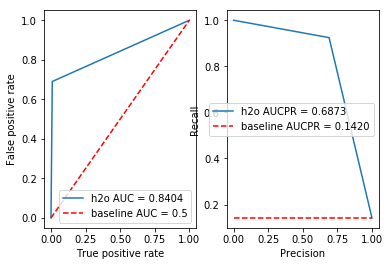

________________________________________________________________________________
*** Dataset Name: churn ***
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Elapsed time is 62.972844 seconds.
*** Top algorithm: *** 

model_id,auc,logloss,mean_per_class_error,rmse,mse
DRF_1_AutoML_20190924_091459,0.917766,0.314764,0.112731,0.206789,0.0427616
XGBoost_3_AutoML_20190924_091459,0.917378,0.15052,0.105278,0.186987,0.0349642
GBM_1_AutoML_20190924_091459,0.917003,0.158823,0.116801,0.194063,0.0376603
StackedEnsemble_BestOfFamily_AutoML_20190924_091459,0.91546,0.138483,0.103048,0.181398,0.0329053
XGBoost_1_AutoML_20190924_091459,0.915389,0.159474,0.0971181,0.192109,0.0369057



drf prediction progress: |████████████████████████████████████████████████| 100%


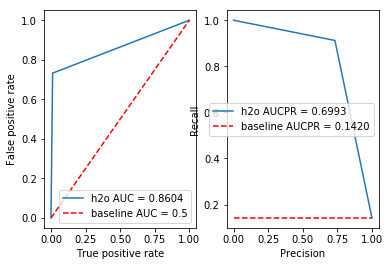

________________________________________________________________________________
*** Dataset Name: churn ***
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Elapsed time is 63.612967 seconds.
*** Top algorithm: *** 

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20190924_091604,0.915365,0.138816,0.103307,0.18163,0.0329893
StackedEnsemble_AllModels_AutoML_20190924_091604,0.914502,0.139169,0.102133,0.181643,0.0329943
XGBoost_3_AutoML_20190924_091604,0.917378,0.15052,0.105278,0.186987,0.0349642
XGBoost_1_AutoML_20190924_091604,0.915389,0.159474,0.0971181,0.192109,0.0369057
GBM_1_AutoML_20190924_091604,0.918546,0.168605,0.105358,0.2007,0.0402805



stackedensemble prediction progress: |████████████████████████████████████| 100%


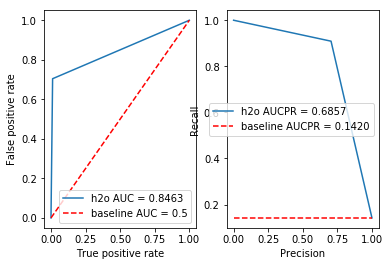

________________________________________________________________________________
*** Dataset Name: nursery ***
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Elapsed time is 61.662895 seconds.
*** Top algorithm: *** 

model_id,mean_per_class_error,logloss,rmse,mse
XGBoost_1_AutoML_20190924_091709,0.0592639,0.122354,0.159009,0.0252838



xgboost prediction progress: |████████████████████████████████████████████| 100%


ValueError: ignored

In [160]:
from pmlb import classification_dataset_names, regression_dataset_names,fetch_data
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
from pytictoc import TicToc


preds = {}
auc_preds = {}
acc_preds = {}
log_preds = {}
cm_preds = {}
f1_preds = {}
top_algo = {}
t = TicToc()


sel_clss_dtst = ['adult','agaricus-lepiota', 'churn', 'nursery', 'satimage','texture']
sel_rgrs_dtst = ['294_satellite_image','218_house_8L', '227_cpu_small', '503_wind', '344_mv','215_2dplanes']

for class_dtst in sel_clss_dtst:
  for metrics_test in ['mean_per_class_error', 'AUC', 'logloss']:
        print("_"*80)
        print(f"*** Dataset Name: {class_dtst} ***")
        X, y = fetch_data(class_dtst, return_X_y=True)
        c=CheckBinomial(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69, stratify=y)
        X_train = h2o.H2OFrame(X_train)
        X_test = h2o.H2OFrame(X_test)
        y_train = h2o.H2OFrame(y_train).asfactor()
        y_test = h2o.H2OFrame(y_test).asfactor()
        list_metrics = c.MLMetrics()
        aml = H2OAutoML(seed=69, max_runtime_secs=60,sort_metric=metrics_test if metrics_test in list_metrics else None)
        t.tic()
        aml.train(x=X_train.columns, y=X_train.cbind(y_train)[:,-1].columns[0], training_frame=X_train.cbind(y_train))
        t.toc()    
        lb = aml.leaderboard
        top_algo[class_dtst] = lb.head(5)
        print("*** Top algorithm: ***", lb.head(5))
        preds[class_dtst] = aml.leader.predict(X_test).as_data_frame()
        p = MetricsCalc(y_test,preds[class_dtst])
        if c._bintype == "binomial":
          auc_preds[class_dtst] = p.auc()
          acc_preds[class_dtst] = p.acc()
          log_preds[class_dtst] = p.logloss()
          cm_preds[class_dtst] = p.cm()
          f1_preds[class_dtst] = p.f1()
          prediction_summary( y_test.as_data_frame(), preds[class_dtst].iloc[:,0], "h2o")
        elif c._bintype == "multinomial":
          acc_preds[class_dtst] = p.acc()
          log_preds[class_dtst] = p.logloss()
          cm_preds[class_dtst] = p.cm()
          f1_preds[class_dtst] = p.f1(average='macro')

In [161]:
class_dtst

'nursery'